In [1]:
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
start = '2020-01-01'
end = '2020-07-22'

In [3]:
asset = get_pricing('DBO',fields='price',start_date=start,end_date=end)

In [6]:
asset.tail()

2020-07-16 00:00:00+00:00    7.28
2020-07-17 00:00:00+00:00    7.27
2020-07-20 00:00:00+00:00    7.27
2020-07-21 00:00:00+00:00    7.40
2020-07-22 00:00:00+00:00    7.42
Freq: C, Name: Equity(33122 [DBO]), dtype: float64

In [7]:
benchmark = get_pricing('SPY',fields='price',start_date=start,end_date=end)

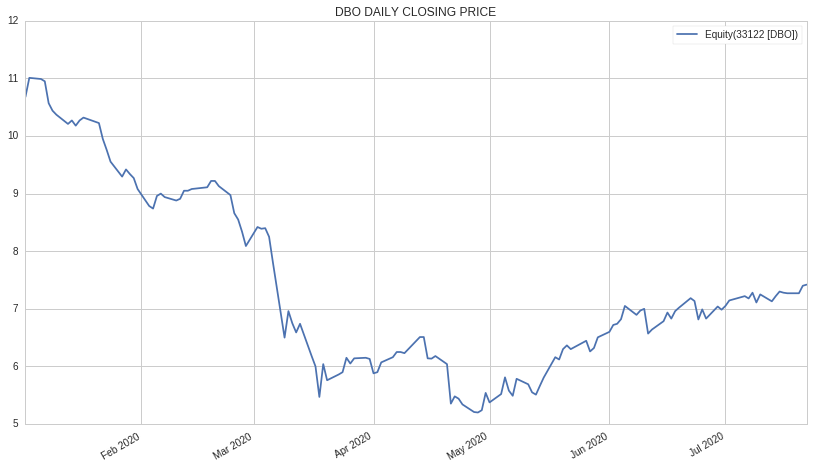

In [8]:
# Plot
asset.plot()
plt.legend()
plt.title('DBO DAILY CLOSING PRICE')

In [9]:
asset_ret = asset.pct_change(1)[1:]
bench_ret = benchmark.pct_change(1)[1:]

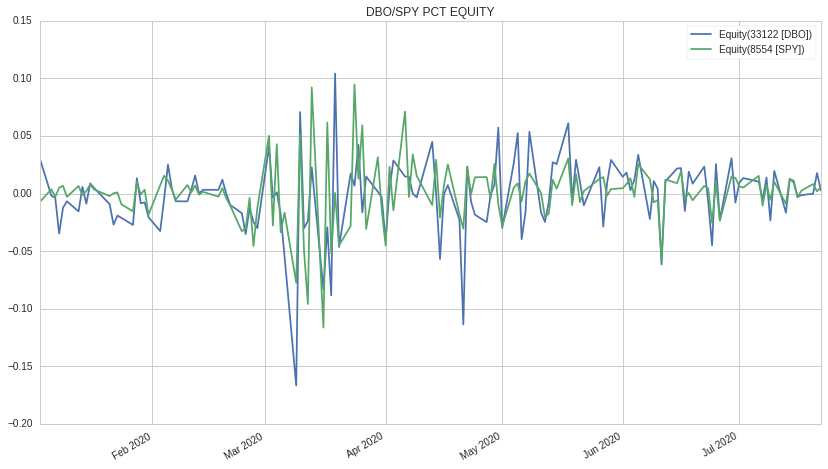

In [10]:
# Plot
asset_ret.plot()
bench_ret.plot()
plt.legend()
plt.title('DBO/SPY PCT EQUITY')

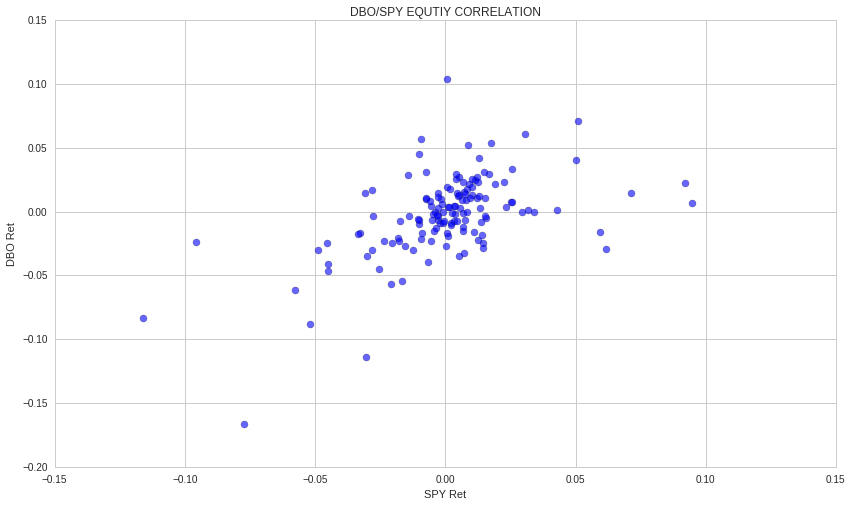

In [11]:
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)
plt.xlabel('SPY Ret')
plt.ylabel('DBO Ret')
plt.title('DBO/SPY EQUTIY CORRELATION')

In [12]:
DBO = asset_ret.values
SPY = bench_ret.values

In [13]:
SPY_constant = sm.add_constant(SPY)

In [14]:
model = regression.linear_model.OLS(DBO,SPY_constant).fit()

In [15]:
model.params

array([-0.00240119,  0.62395513])

In [16]:
alpha,beta = model.params

In [17]:
alpha

-0.0024011889037521389

In [18]:
beta

0.62395512966407796

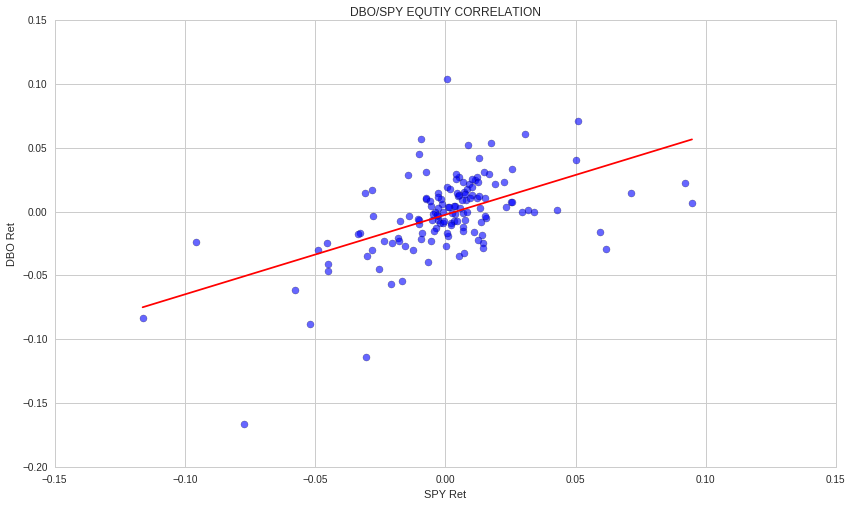

In [19]:
min_SPY = bench_ret.values.min()
max_SPY = bench_ret.values.max()

SPY_line = np.linspace(min_SPY,max_SPY,100)
y = SPY_line*beta + alpha

plt.plot(SPY_line,y,'r')
plt.scatter(bench_ret,asset_ret,alpha=0.6,s=50)
plt.xlabel('SPY Ret')
plt.ylabel('DBO Ret')
plt.title('DBO/SPY EQUTIY CORRELATION')

In [20]:
hedged = -1*(beta*bench_ret) + asset_ret

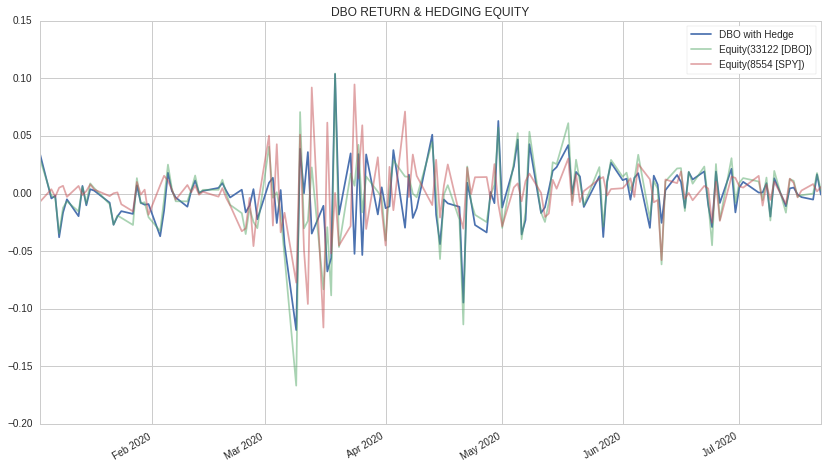

In [21]:
hedged.plot(label='DBO with Hedge')
asset_ret.plot(alpha=0.5)
bench_ret.plot(alpha=0.5)
plt.legend()
plt.title('DBO RETURN & HEDGING EQUITY')

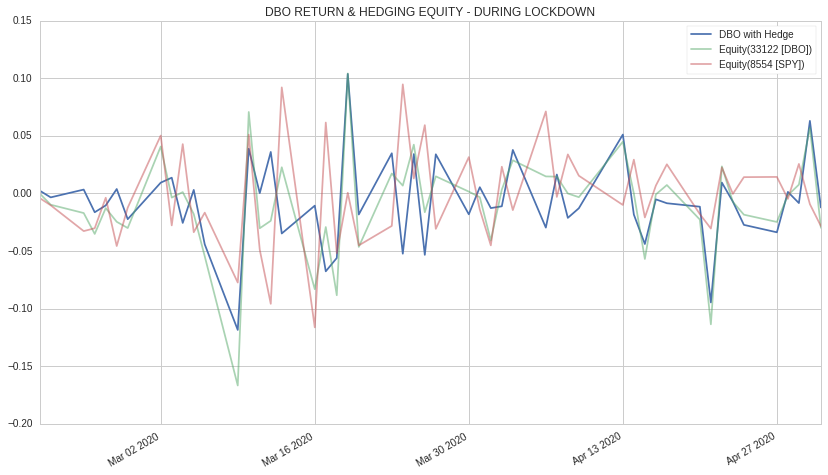

In [22]:
hedged.plot(label='DBO with Hedge')
asset_ret.plot(alpha=0.5)
bench_ret.plot(alpha=0.5)
plt.xlim(['2020-02-20','2020-05-01'])
plt.legend()
plt.title('DBO RETURN & HEDGING EQUITY - DURING LOCKDOWN')

In [23]:
def alpha_beta(benchmark_ret,stock):
    benchmark = sm.add_constant(benchmark_ret)
    model = regression.linear_model.OLS(stock,benchmark).fit()
    return model.params[0],model.params[1]

In [24]:
# 2019 Cell

start = '2019-01-01'
end = '2020-01-01'
asset2019 = get_pricing('DBO',fields='price',start_date=start,end_date=end)
benchmark2019 = get_pricing('SPY',fields='price',start_date=start,end_date=end)

asset_ret2019 = asset2019.pct_change(1)[1:]
benchmark_ret2019 = benchmark2019.pct_change(1)[1:]

aret_values = asset_ret2019.values
bret_values = benchmark_ret2019.values

alpha2019,beta2019 = alpha_beta(bret_values,aret_values)

print('2019 VAlUES')
print('alpha '+str(alpha2019))
print('beta '+str(beta2019))

2019 VAlUES
alpha 0.000207069515653
beta 0.775826789973


In [25]:
portfolio = -1*beta2019*benchmark_ret2019 + asset_ret2019

In [26]:
alpha,beta = alpha_beta(benchmark_ret2019,portfolio)

In [27]:
print('PORTFOLIO ALPHA AND BETA')
print('alpha '+str(alpha))
print('beta '+str(beta))

PORTFOLIO ALPHA AND BETA
alpha 0.000207069515653
beta 8.06646416329e-17


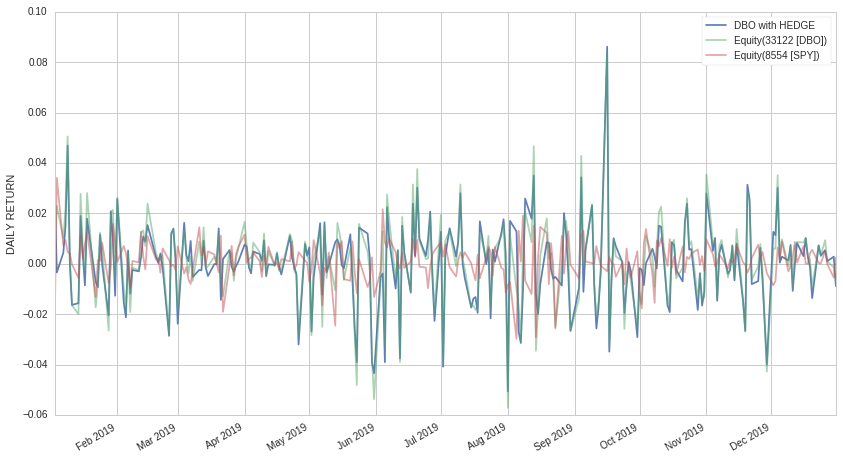

In [28]:
portfolio.plot(alpha=0.9,label='DBO with HEDGE')
asset_ret2019.plot(alpha=0.5)
benchmark_ret2019.plot(alpha=0.5)
plt.ylabel('DAILY RETURN')
plt.legend()

In [29]:
portfolio.mean()

0.0002070695156529873

In [30]:
asset_ret2019.mean()

0.0010673894427974432

In [31]:
portfolio.std()

0.01613291498244332

In [32]:
asset_ret2019.std()

0.01724498801450509

In [34]:
# Get data for a different time frame:
# 2020 Cell

start = '2020-01-01'
end = '2020-07-22'
asset2020 = get_pricing('DBO',fields='price',start_date=start,end_date=end)
benchmark2020 = get_pricing('SPY',fields='price',start_date=start,end_date=end)

asset_ret2020 = asset2020.pct_change(1)[1:]
benchmark_ret2020 = benchmark2020.pct_change(1)[1:]

aret_values = asset_ret2020.values
bret_values = benchmark_ret2020.values

alpha2020,beta2020 = alpha_beta(bret_values,aret_values)

print('2020 CURRENT VAlUES')
print('alpha '+str(alpha2020))
print('beta '+str(beta2020))

2020 CURRENT VAlUES
alpha -0.00240118890375
beta 0.623955129664


In [35]:
alpha2020

-0.0024011889037521389

In [36]:
beta2020

0.62395512966407796

In [45]:
portfolio = -1*beta2019*benchmark_ret2020 + asset_ret2020

In [46]:
alpha,beta = alpha_beta(benchmark_ret2020,portfolio)

In [47]:
alpha

-0.0024011889037521398

In [48]:
beta

-0.15187166030867538

In [49]:
portfolio.mean()

-0.0024769349693556787

In [50]:
asset_ret2020.mean()

-0.002089990974598388

In [51]:
portfolio.std()

0.027406096382408606

In [52]:
asset_ret2020.std()

0.03209106565102346